In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
file_path = '/content/drive/MyDrive/CS 267/Models_CA/filtered_dataset_CA.csv'

In [3]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import numpy as np
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
import joblib
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
housing_data = pd.read_csv(file_path)

# Display basic information and the first few rows of the dataset
print(housing_data.info())
print(housing_data.head())

# Drop irrelevant columns
columns_to_drop = ['region_type', 'region_type_id', 'table_id', 'state', 'state_code', 'last_updated']
housing_data_cleaned = housing_data.drop(columns=columns_to_drop)

housing_data_cleaned = housing_data_cleaned.dropna()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 259541 entries, 0 to 259540
Data columns (total 53 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   period_begin                    259541 non-null  object 
 1   period_end                      259541 non-null  object 
 2   period_duration                 259541 non-null  int64  
 3   region_type                     259541 non-null  object 
 4   region_type_id                  259541 non-null  int64  
 5   table_id                        259541 non-null  int64  
 6   is_seasonally_adjusted          259541 non-null  object 
 7   region                          259541 non-null  object 
 8   state                           259541 non-null  object 
 9   state_code                      259541 non-null  object 
 10  property_type                   259541 non-null  object 
 11  property_type_id                259541 non-null  int64  
 12  median_sale_pric

In [5]:
# Convert 'period_begin' to datetime and extract 'year' and 'month'
housing_data['period_begin'] = pd.to_datetime(housing_data['period_begin'])
housing_data['year'] = housing_data['period_begin'].dt.year
housing_data['month'] = housing_data['period_begin'].dt.month

In [6]:
# housing_data.drop(['period_begin'], axis=1)

In [7]:
num_rows = housing_data.shape[0]
print("Number of rows after removing years:", num_rows)

rows_2012 = housing_data[housing_data['year'] == 2012]
print("Number of rows for year 2012:", len(rows_2012))
rows_2013 = housing_data[housing_data['year'] == 2013]
print("Number of rows for year 2013:", len(rows_2013))
rows_2014 = housing_data[housing_data['year'] == 2014]
print("Number of rows for year 2014:", len(rows_2014))
rows_2015 = housing_data[housing_data['year'] == 2015]
print("Number of rows for year 2015:", len(rows_2015))
rows_2016 = housing_data[housing_data['year'] == 2016]
print("Number of rows for year 2016:", len(rows_2016))
rows_2017 = housing_data[housing_data['year'] == 2017]
print("Number of rows for year 2017:", len(rows_2017))
rows_2018 = housing_data[housing_data['year'] == 2018]
print("Number of rows for year 2018:", len(rows_2018))
rows_2019 = housing_data[housing_data['year'] == 2019]
print("Number of rows for year 2019:", len(rows_2019))
rows_2020 = housing_data[housing_data['year'] == 2020]
print("Number of rows for year 2020:", len(rows_2020))
rows_2021 = housing_data[housing_data['year'] == 2021]
print("Number of rows for year 2021:", len(rows_2021))

# Display other years present in the DataFrame
other_years = housing_data['year'][housing_data['year'] != 2021].unique()
print("Other years present in the DataFrame:", other_years)

Number of rows after removing years: 259541
Number of rows for year 2012: 0
Number of rows for year 2013: 0
Number of rows for year 2014: 0
Number of rows for year 2015: 37894
Number of rows for year 2016: 38025
Number of rows for year 2017: 37865
Number of rows for year 2018: 37888
Number of rows for year 2019: 37669
Number of rows for year 2020: 37751
Number of rows for year 2021: 32449
Other years present in the DataFrame: [2019 2018 2020 2015 2017 2016]


In [ ]:
# Display the first few rows of the dataset
print(housing_data.head())

# Summary statistics
print(housing_data.describe())

# Data types
print(housing_data.dtypes)

# Check for missing values
print(housing_data.isnull().sum())


  period_begin  period_end  period_duration region_type  region_type_id  \
0   2019-10-01  2019-12-31               90    zip code               2   
1   2018-05-01  2018-07-31               90    zip code               2   
2   2021-01-01  2021-03-31               90    zip code               2   
3   2020-08-01  2020-10-31               90    zip code               2   
4   2018-12-01  2019-02-28               90    zip code               2   

   table_id is_seasonally_adjusted           region       state state_code  \
0     38930                      f  Zip Code: 93901  California         CA   
1     38330                      f  Zip Code: 92411  California         CA   
2     39782                      f  Zip Code: 95658  California         CA   
3     38416                      f  Zip Code: 92625  California         CA   
4     38261                      f  Zip Code: 92320  California         CA   

   ... sold_above_list_mom  sold_above_list_yoy  off_market_in_two_weeks  \
0  .

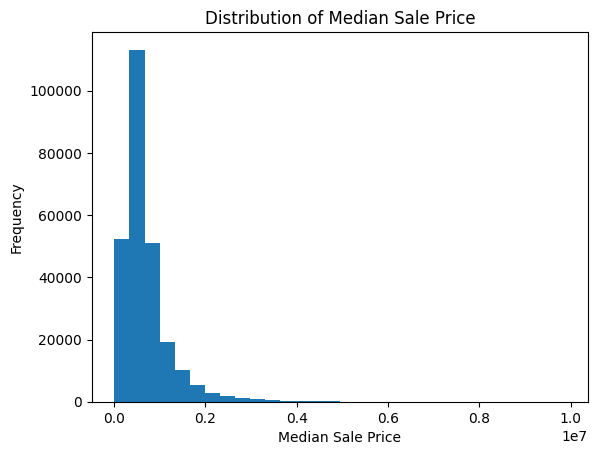

In [ ]:
# Histogram for 'median_sale_price'
plt.hist(housing_data['median_sale_price'], bins=30)
plt.title('Distribution of Median Sale Price')
plt.xlabel('Median Sale Price')
plt.ylabel('Frequency')
plt.show()


<ipython-input-10-6e4f1dc47057>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = housing_data.corr()


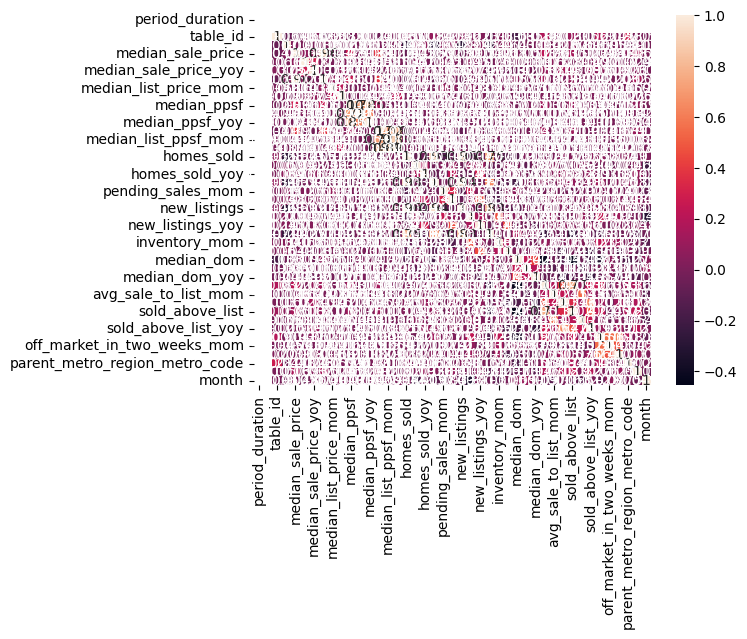

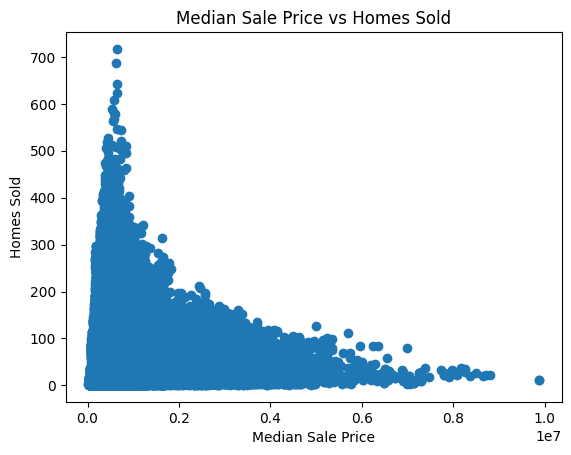

In [ ]:
# Correlation matrix
correlation_matrix = housing_data.corr()
sns.heatmap(correlation_matrix, annot=True)
plt.show()

plt.scatter(housing_data['median_sale_price'], housing_data['homes_sold'])
plt.title('Median Sale Price vs Homes Sold')
plt.xlabel('Median Sale Price')
plt.ylabel('Homes Sold')
plt.show()


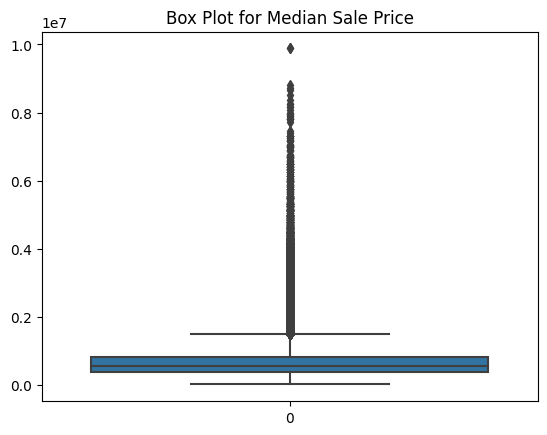

In [ ]:
# Box plot for 'median_sale_price'
sns.boxplot(housing_data['median_sale_price'])
plt.title('Box Plot for Median Sale Price')
plt.show()


In [ ]:
housing_data_cleaned['market_hotness'] = housing_data_cleaned['median_sale_price'] / housing_data_cleaned['median_list_price']


In [ ]:
# Identify numerical and categorical columns
numerical_cols = housing_data_cleaned.select_dtypes(include=['int64', 'float64']).columns
categorical_cols = housing_data_cleaned.select_dtypes(include=['object']).columns

# Create a column transformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_cols),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_cols)
    ])

housing_data_transformed = preprocessor.fit_transform(housing_data_cleaned)

# Check the shape right after transformation
print("Shape after transformation:", housing_data_transformed.shape)


Shape after transformation: (259541, 1513)


In [ ]:
print(preprocessor)


ColumnTransformer(transformers=[('num', StandardScaler(),
                                 Index(['period_duration', 'property_type_id', 'median_sale_price',
       'median_sale_price_mom', 'median_sale_price_yoy', 'median_list_price',
       'median_list_price_mom', 'median_list_price_yoy', 'median_ppsf',
       'median_ppsf_mom', 'median_ppsf_yoy', 'median_list_ppsf',
       'median_list_ppsf_mom', 'median_list_ppsf_yoy'...
       'sold_above_list', 'sold_above_list_mom', 'sold_above_list_yoy',
       'off_market_in_two_weeks', 'off_market_in_two_weeks_mom',
       'off_market_in_two_weeks_yoy', 'parent_metro_region_metro_code', 'year',
       'month', 'market_hotness'],
      dtype='object')),
                                ('cat', OneHotEncoder(handle_unknown='ignore'),
                                 Index(['period_begin', 'period_end', 'is_seasonally_adjusted', 'region',
       'property_type', 'parent_metro_region'],
      dtype='object'))])


In [ ]:
housing_data_cleaned.shape

(259541, 48)

In [ ]:
# Get names of one-hot encoded columns
ohe_columns = preprocessor.named_transformers_['cat'].get_feature_names_out(categorical_cols)

# Combine with numerical columns
transformed_columns = list(numerical_cols) + list(ohe_columns)


In [ ]:
print(transformed_columns)

['period_duration', 'property_type_id', 'median_sale_price', 'median_sale_price_mom', 'median_sale_price_yoy', 'median_list_price', 'median_list_price_mom', 'median_list_price_yoy', 'median_ppsf', 'median_ppsf_mom', 'median_ppsf_yoy', 'median_list_ppsf', 'median_list_ppsf_mom', 'median_list_ppsf_yoy', 'homes_sold', 'homes_sold_mom', 'homes_sold_yoy', 'pending_sales', 'pending_sales_mom', 'pending_sales_yoy', 'new_listings', 'new_listings_mom', 'new_listings_yoy', 'inventory', 'inventory_mom', 'inventory_yoy', 'median_dom', 'median_dom_mom', 'median_dom_yoy', 'avg_sale_to_list', 'avg_sale_to_list_mom', 'avg_sale_to_list_yoy', 'sold_above_list', 'sold_above_list_mom', 'sold_above_list_yoy', 'off_market_in_two_weeks', 'off_market_in_two_weeks_mom', 'off_market_in_two_weeks_yoy', 'parent_metro_region_metro_code', 'year', 'month', 'market_hotness', 'period_begin_2015-01-01', 'period_begin_2015-02-01', 'period_begin_2015-03-01', 'period_begin_2015-04-01', 'period_begin_2015-05-01', 'period_b

In [ ]:
print("Number of transformed columns:", len(transformed_columns))

Number of transformed columns: 1513


In [ ]:
# Convert the sparse matrix to a dense format
housing_data_dense = housing_data_transformed.toarray()

# Create the DataFrame with the dense data
X = pd.DataFrame(housing_data_dense, columns=transformed_columns)


In [ ]:
# Use the sparse matrix directly for model training
X_sparse = housing_data_transformed

y_price = housing_data_cleaned['median_sale_price']
y_demand = housing_data_cleaned['homes_sold']

# # Splitting the dataset based on the year
# train_data = housing_data[housing_data['year'] < 2020]
# test_data = housing_data[housing_data['year'] == 2021]

# X_train_price = train_data.drop(['median_sale_price', 'homes_sold'], axis=1)
# y_train_price = train_data['median_sale_price']

# X_test_price = test_data.drop(['median_sale_price', 'homes_sold'], axis=1)
# y_test_price = test_data['median_sale_price']

# X_train_demand = train_data.drop(['median_sale_price', 'homes_sold'], axis=1)
# y_train_demand = train_data['homes_sold']

# X_test_demand = test_data.drop(['median_sale_price', 'homes_sold'], axis=1)
# y_test_demand = test_data['homes_sold']


# Split the data for price prediction model
X_train_price, X_test_price, y_train_price, y_test_price = train_test_split(X_sparse, y_price, test_size=0.2, random_state=42)
X_train_demand, X_test_demand, y_train_demand, y_test_demand = train_test_split(X_sparse, y_demand, test_size=0.2, random_state=0)



In [ ]:
model = RandomForestRegressor()
model.fit(X_train_price, y_train_price)
importances = model.feature_importances_
feature_importances = pd.DataFrame({'Feature': X.columns, 'Importance': importances})
feature_importances = feature_importances.sort_values(by='Importance', ascending=False)
print(feature_importances)


                          Feature  Importance
2               median_sale_price    0.999909
36    off_market_in_two_weeks_mom    0.000013
41                 market_hotness    0.000007
186         period_end_2020-05-31    0.000007
18              pending_sales_mom    0.000006
...                           ...         ...
1408       region_Zip Code: 95724    0.000000
948        region_Zip Code: 93651    0.000000
943        region_Zip Code: 93642    0.000000
922        region_Zip Code: 93601    0.000000
0                 period_duration    0.000000

[1513 rows x 2 columns]


In [ ]:
# Price Prediction Model
model_price = LinearRegression()
model_price.fit(X_train_price, y_train_price)

# Predict and evaluate
y_pred_price = model_price.predict(X_test_price)
rmse_price = mean_squared_error(y_test_price, y_pred_price, squared=False)
mse_price = mean_squared_error(y_test_price, y_pred_price)
mae_price = mean_absolute_error(y_test_price, y_pred_price)
r2_price = r2_score(y_test_price, y_pred_price)

In [ ]:
# Demand Prediction Model
model_demand = LinearRegression()
model_demand.fit(X_train_demand, y_train_demand)

# Predict and evaluate
y_pred_demand = model_demand.predict(X_test_demand)
rmse_demand = mean_squared_error(y_test_demand, y_pred_demand, squared=False)
mse_demand = mean_squared_error(y_test_demand, y_pred_demand)
mae_demand = mean_absolute_error(y_test_demand, y_pred_demand)
r2_demand = r2_score(y_test_demand, y_pred_demand)

In [ ]:
print(f'RMSE for Price Prediction: {rmse_price}')
print(f'MSE for Price Prediction: {mse_price}')
print(f'MAE for Price Prediction: {mae_price}')
print(f'R2 for Price Prediction: {r2_price}')


RMSE for Price Prediction: 18.608254459338802
MSE for Price Prediction: 346.26713402350236
MAE for Price Prediction: 4.2723401914288575
R2 for Price Prediction: 0.999999998815114


In [ ]:

print(f'RMSE for Demand Prediction: {rmse_price}')
print(f'MSE for Demand Prediction: {mse_price}')
print(f'MAE for Demand Prediction: {mae_price}')
print(f'R2 for Demand Prediction: {r2_price}')

RMSE for Demand Prediction: 18.608254459338802
MSE for Demand Prediction: 346.26713402350236
MAE for Demand Prediction: 4.2723401914288575
R2 for Demand Prediction: 0.999999998815114


In [ ]:
most_demand = housing_data_cleaned.groupby('region')['homes_sold'].sum().sort_values(ascending=False)

print(most_demand.head())  # Prints top 5 regions with the most demand


region
Zip Code: 92253    65411.0
Zip Code: 92592    60480.0
Zip Code: 95747    58460.0
Zip Code: 92563    51826.0
Zip Code: 92211    50408.0
Name: homes_sold, dtype: float64


In [ ]:
def train_evaluate_save_model(model, params, X_train, X_test, y_train, y_test, model_name):
    grid_search = GridSearchCV(model, params, cv=5, scoring='neg_mean_squared_error')
    grid_search.fit(X_train, y_train)
    best_model = grid_search.best_estimator_

    # Evaluate on training set
    train_predictions = best_model.predict(X_train)
    train_mse = mean_squared_error(y_train, train_predictions)
    train_rmse = mean_squared_error(y_train, train_predictions, squared=False)
    train_mae = mean_absolute_error(y_train, train_predictions)
    train_r2 = r2_score(y_train, train_predictions)

    # Evaluate on test set
    test_predictions = best_model.predict(X_test)
    test_mse = mean_squared_error(y_test, test_predictions)
    test_rmse = mean_squared_error(y_test, test_predictions, squared=False)
    test_mae = mean_absolute_error(y_test, test_predictions)
    test_r2 = r2_score(y_test, test_predictions)

    print(f"Best Parameters: {grid_search.best_params_}")
    print(f"Training - MSE: {train_mse}, RMSE: {train_rmse}, MAE: {train_mae}, R2: {train_r2}")
    print(f"Test - MSE: {test_mse}, RMSE: {test_rmse}, MAE: {test_mae}, R2: {test_r2}")

    # Save the model
    joblib.dump(best_model, f'{model_name}.pkl')
    print(f"Model saved as {model_name}.pkl")

    save_path = f'/content/drive/MyDrive/CS 267/Models_CA/{model_name}.pkl'
    joblib.dump(best_model, save_path)
    print(f"Model saved to Google Drive as {save_path}")

    return best_model


In [ ]:
# Decision Tree parameters for Price Prediction
params_dt_price = {'max_depth': [10, 20, 30], 'min_samples_split': [2, 5, 10]}

model_dt_price = train_evaluate_save_model(
    DecisionTreeRegressor(),
    params_dt_price,
    X_train_price,
    X_test_price,
    y_train_price,
    y_test_price,
    "Decision_Tree_price_model"
)

# Random Forest
params_rf_price = {'n_estimators': [100, 200], 'max_depth': [10, 20]}
model_rf_price = train_evaluate_save_model(RandomForestRegressor(), params_rf_price, X_train_price, X_test_price, y_train_price, y_test_price,"Random_Forest_price_model")

# XGBoost
params_xgb_price = {'n_estimators': [100, 200], 'learning_rate': [0.01, 0.1]}
model_xgb_price = train_evaluate_save_model(XGBRegressor(), params_xgb_price, X_train_price, X_test_price, y_train_price, y_test_price,"XGBoost_price_model")



Best Parameters: {'max_depth': 20, 'min_samples_split': 2}
Training - MSE: 0.0, RMSE: 0.0, MAE: 0.0, R2: 1.0
Test - MSE: 20754669.27723516, RMSE: 4555.729280503305, MAE: 77.54820936639119, R2: 0.9999289799276995
Model saved as Decision_Tree_price_model.pkl
Model saved to Google Drive as /content/drive/MyDrive/CS 267/Models_CA/Decision_Tree_price_model.pkl


In [ ]:
# # Decision Tree parameters for demand Prediction
# params_dt_demand = {'max_depth': [10, 20, 30], 'min_samples_split': [2, 5, 10]}

# model_dt_demand = train_evaluate_save_model(
#     DecisionTreeRegressor(),
#     params_dt_demand,
#     X_train_demand,
#     X_test_demand,
#     y_train_demand,
#     y_test_demand,
#     "Decision_Tree_demand_model"
# )

# # Random Forest
# params_rf_demand = {'n_estimators': [100, 200], 'max_depth': [10, 20]}
# model_rf_demand = train_evaluate_save_model(RandomForestRegressor(), params_rf_demand, X_train_demand, X_test_demand, y_train_demand, y_test_demand,"Random_Forest_demand_model")

# # XGBoost
# params_xgb_demand = {'n_estimators': [100, 200], 'learning_rate': [0.01, 0.1]}
# model_xgb_demand = train_evaluate_save_model(XGBRegressor(), params_xgb_demand, X_train_demand, X_test_demand, y_train_demand, y_test_demand,"XGBoost_demand_model")

